In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import rfe
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

C:\Users\maild\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.rfe module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection.rfe. Anything that cannot be imported from sklearn.feature_selection.rfe is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Lead_df = pd.read_csv(r'C:\Users\maild\Downloads\Leads.csv')
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
Lead_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

Below we replace **'Select'** values with null values

In [5]:
Lead_df = Lead_df.replace('select',np.nan)
Lead_df = Lead_df.replace('Select',np.nan)

In [6]:
# Below we try to find out the count of unique values across each columns in our dataframe

In [7]:
Lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# we will drop prospect ID as we already having a unique number in the form of 'Lead number'. 
# Additionally we drop coluns with only 1 unique value

Lead_df.drop(['Prospect ID','Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],  axis='columns', inplace=True)  

In [9]:
Lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [10]:
Lead_df.isnull().sum()/len(Lead_df)*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

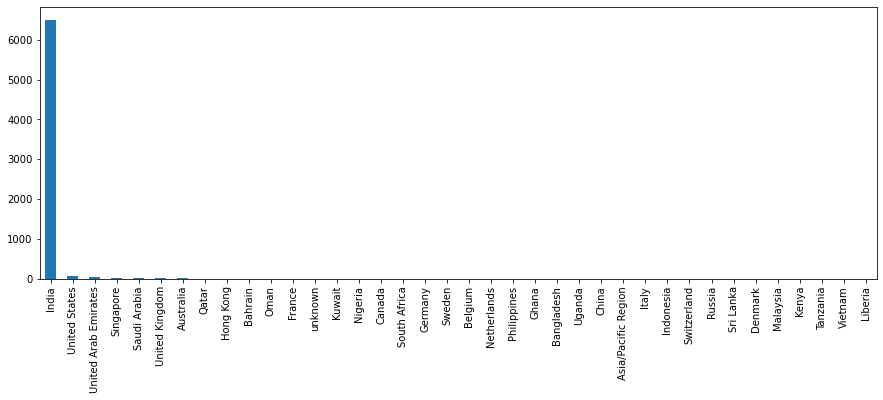

In [11]:
# we notice the Country data is skewed towards India. Hence we shall drop this variable 
plt.figure(figsize=(15,5))
Lead_df['Country'].value_counts().plot(kind='bar')
plt.show()

In [12]:
# Also we notice that Last Activity and Last Notable Activity are similar columns. 
# Hence we shall drop 'Last Notable Activity' 

Lead_df[['Last Activity','Last Notable Activity']]

,Last Activity,Last Notable Activity
0,Page Visited on Website,Modified
1,Email Opened,Email Opened
2,Email Opened,Email Opened
3,Unreachable,Modified
4,Converted to Lead,Modified
...,...,...
9235,Email Marked Spam,Email Marked Spam
9236,SMS Sent,SMS Sent
9237,SMS Sent,SMS Sent
9238,SMS Sent,SMS Sent


In [13]:
# apart from 'Last Notable Activity' and 'Country' columns we shall also drop the below columns they have a great % of missing values
# - 'Specialization'
# - 'How did you hear about X Education'
# - 'Tags'
# - 'Lead Quality'
# - 'Lead Profile'
# - 'City'
# - 'Asymmetrique Activity Index'
# - 'Asymmetrique Profile Index'
# - 'Asymmetrique Activity Score'
# - 'Asymmetrique Profile Score'
# - 'Last Notable Activity'

In [14]:
Lead_df.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'Country', 'City','Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Last Notable Activity'],  axis='columns', inplace=True)  

In [15]:
Lead_df.isnull().sum()/len(Lead_df)*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.0000

In [16]:
# we will impute the missing values for the below columns by finding out their most commonly featuring values
# 1) What is your current occupation
# 2) What matters most to you in choosing a course

In [17]:
Lead_df['What matters most to you in choosing a course'].value_counts()/len(Lead_df)*100

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [18]:
Lead_df['What is your current occupation'].value_counts()/len(Lead_df)*100

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [19]:
# so we found out that 
# 1) 'Unemployed' is the most common variable for 'Current occupation' column
# 2) 'Better Career Prospects' are most common for 'What is your current occupation' column

Lead_df['What matters most to you in choosing a course'] = Lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
Lead_df['What is your current occupation'] = Lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [20]:
Lead_df.isnull().sum()/len(Lead_df)*100

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advertisement                            0.000000
Through Recomm

In [21]:
# since the missing values are too low we will just drop these records/rows from our dataframe

Lead_df = Lead_df.dropna()

In [22]:
Lead_df.shape

(9074, 19)

In [23]:
Lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No


In [24]:
# We find the column names too big and not friendly from readability perspective. 

Lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [25]:
# Hence we modify the column names to make them appear crisp and friendly


Lead_df.columns = ['Lead No', 'Origin', 'Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Time_Spent_on_Website', 'Views_Per_Visit', 'Last Activity',
        'Occupation',
       'Course_expectations', 'Search',
       'News Article', 'Education Forums', 'Newspaper',
       'Digital Ads', 'Referrals',
       'Opted for Mastering_The_Interview']

In [26]:
Lead_df.head()

,Lead No,Origin,Source,Do Not Email,Do Not Call,Converted,TotalVisits,Time_Spent_on_Website,Views_Per_Visit,Last Activity,Occupation,Course_expectations,Search,News Article,Education Forums,Newspaper,Digital Ads,Referrals,Opted for Mastering_The_Interview
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No


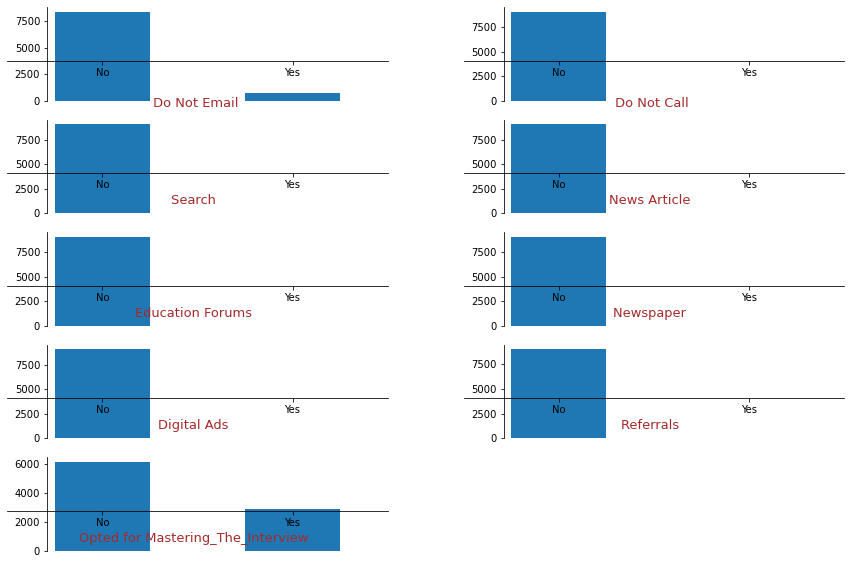

In [27]:
# we try to plot the skewness in our categorical variables to see if we could drop any columns which are heavily skewed


plt.figure(figsize =(15,10))

plt.subplot(5,2,1)
Lead_df['Do Not Email'].value_counts().plot(kind='bar')
plt.xlabel('\n Do Not Email  \n', fontsize=13, color ='brown')

plt.subplot(5,2,2)
Lead_df['Do Not Call'].value_counts().plot(kind='bar')
plt.xlabel('\n Do Not Call  \n', fontsize=13, color ='brown')

plt.subplot(5,2,3)
Lead_df['Search'].value_counts().plot(kind='bar')
plt.xlabel('Search  \n', fontsize=13, color ='brown')

plt.subplot(5,2,4)
Lead_df['News Article'].value_counts().plot(kind='bar')
plt.xlabel('News Article  \n', fontsize=13, color ='brown')

plt.subplot(5,2,5)
Lead_df['Education Forums'].value_counts().plot(kind='bar')
plt.xlabel('Education Forums  \n', fontsize=13, color ='brown')

plt.subplot(5,2,6)
Lead_df['Newspaper'].value_counts().plot(kind='bar')
plt.xlabel('Newspaper  \n', fontsize=13, color ='brown')

plt.subplot(5,2,7)
Lead_df['Digital Ads'].value_counts().plot(kind='bar')
plt.xlabel('Digital Ads  \n', fontsize=13, color ='brown')

plt.subplot(5,2,8)
Lead_df['Referrals'].value_counts().plot(kind='bar')
plt.xlabel('Referrals  \n', fontsize=13, color ='brown')
sns.despine(offset=-40)

plt.subplot(5,2,9)
Lead_df['Opted for Mastering_The_Interview'].value_counts().plot(kind='bar')
plt.xlabel('Opted for Mastering_The_Interview  \n', fontsize=13, color ='brown')
sns.despine(offset=-40)

plt.show()

In [28]:
# the bar charts suggest that the following columns are heavily skewed towards one variable which will impact our analysis
# Hence we decide to drop these columns 
# - 'Do Not Call'
# - 'Search'
# - 'Education Forums'
# - 'News Article'
# - 'Newspaper'
# - 'Digital Ads'
# - 'Referrals'

In [29]:
Lead_df.drop(['Do Not Call', 'Search', 'Education Forums', 'News Article', 'Newspaper', 'Digital Ads', 'Referrals'],  axis='columns', inplace=True)  

In [30]:
Lead_df.head()

,Lead No,Origin,Source,Do Not Email,Converted,TotalVisits,Time_Spent_on_Website,Views_Per_Visit,Last Activity,Occupation,Course_expectations,Opted for Mastering_The_Interview
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No


In [31]:
Lead_df.shape

(9074, 12)

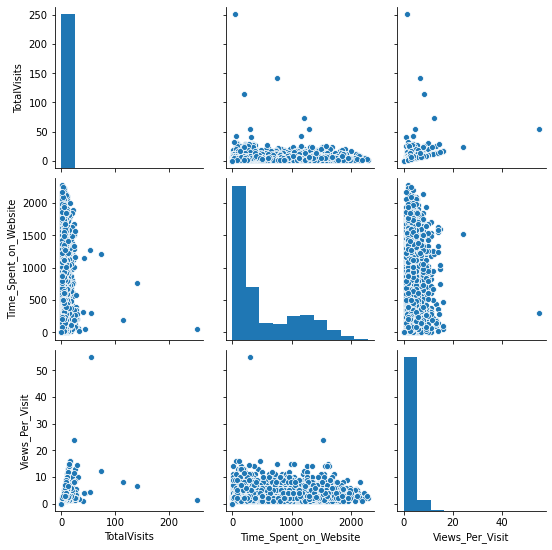

In [32]:
# the below chart shows that there are outliers in some variables

sns.pairplot(Lead_df, vars=['TotalVisits','Time_Spent_on_Website','Views_Per_Visit'])
plt.show()

In [33]:
Lead_df.describe()

,Lead No,Converted,TotalVisits,Time_Spent_on_Website,Views_Per_Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


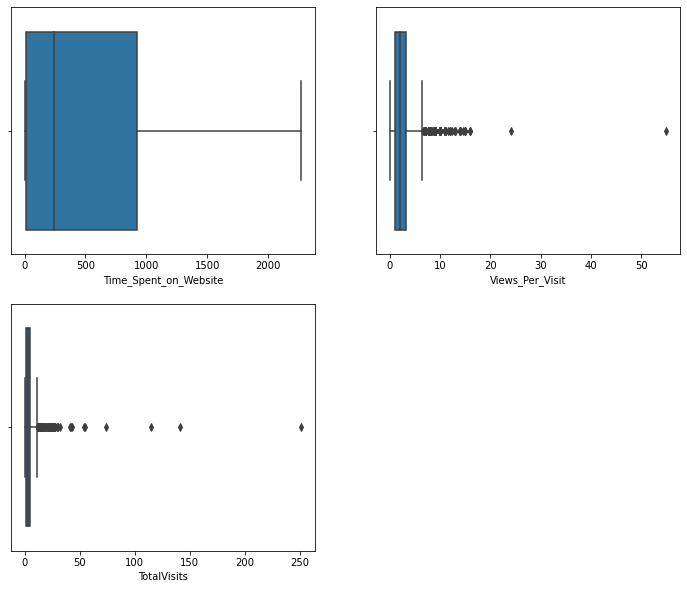

In [34]:
# the boxplots confirm that there are outliers in 'Views_Per_Visit' and 'TotalVisits'

plt.figure(figsize=(12,10))


plt.subplot(2,2,1)
sns.boxplot(Lead_df['Time_Spent_on_Website'])

plt.subplot(2,2,2)
sns.boxplot(Lead_df['Views_Per_Visit'])

plt.subplot(2,2,3)
sns.boxplot(Lead_df['TotalVisits'])

plt.show()

In [35]:
# Hence we  get rid of the outliers for both columns by excluding data beyond 99th quantiles

Lead_df = Lead_df[Lead_df['TotalVisits'] < Lead_df['TotalVisits'].quantile(0.99)]
Lead_df = Lead_df[Lead_df['Views_Per_Visit'] < Lead_df['Views_Per_Visit'].quantile(0.99)]

In [36]:
Lead_df.shape

(8863, 12)

In [37]:
Lead_df.describe()

,Lead No,Converted,TotalVisits,Time_Spent_on_Website,Views_Per_Visit
count,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000
mean,617064.374704,0.378089,3.098387,478.122193,2.236941
std,23312.547300,0.484937,2.821961,544.532372,1.835885
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596446.500000,0.000000,1.000000,5.000000,1.000000
50%,615468.000000,0.000000,3.000000,240.000000,2.000000
75%,637152.000000,1.000000,4.000000,913.000000,3.000000
max,660737.000000,1.000000,16.000000,2272.000000,8.000000


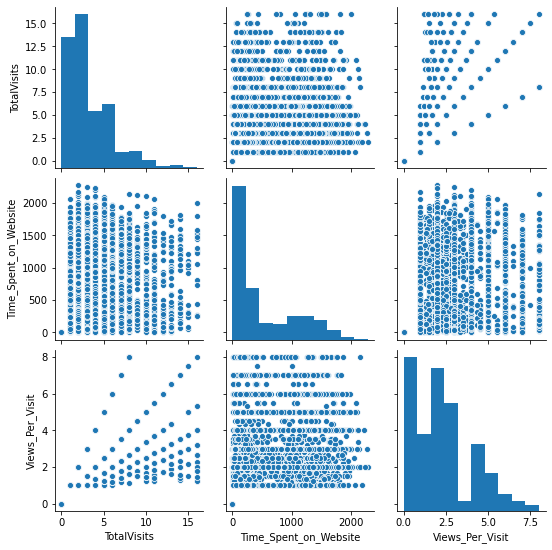

In [38]:
sns.pairplot(Lead_df, vars=['TotalVisits','Time_Spent_on_Website','Views_Per_Visit'])
plt.show()

In [39]:
# We see high multi collinearity between 'TotalVisits' and 'Views_Per_Visit' columns
# Hence we chose to drop the 'TotalVisits' column from our dataframce

Lead_df.drop(['TotalVisits'], axis='columns', inplace=True)

In [40]:
Lead_df.head()

,Lead No,Origin,Source,Do Not Email,Converted,Time_Spent_on_Website,Views_Per_Visit,Last Activity,Occupation,Course_expectations,Opted for Mastering_The_Interview
0,660737,API,Olark Chat,No,0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No
1,660728,API,Organic Search,No,0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No
2,660727,Landing Page Submission,Direct Traffic,No,1,1532,2.0,Email Opened,Student,Better Career Prospects,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No
4,660681,Landing Page Submission,Google,No,1,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No


In [41]:
# in our next step we try to convert our categorical columns with 2 variables into numeric variables

In [42]:

varlist =  ['Do Not Email', 'Opted for Mastering_The_Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

Lead_df[varlist] = Lead_df[varlist].apply(binary_map)

In [43]:
Lead_df.head()

,Lead No,Origin,Source,Do Not Email,Converted,Time_Spent_on_Website,Views_Per_Visit,Last Activity,Occupation,Course_expectations,Opted for Mastering_The_Interview
0,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0
1,660728,API,Organic Search,0,0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0
2,660727,Landing Page Submission,Direct Traffic,0,1,1532,2.0,Email Opened,Student,Better Career Prospects,1
3,660719,Landing Page Submission,Direct Traffic,0,0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0
4,660681,Landing Page Submission,Google,0,1,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0


In [44]:
# below we create dummy variables for the below columns 
# - 'Origin'
# - 'Source'
# - 'Last Activity'
# - 'Occupation'
# - 'Course_expectations'

In [45]:
df_new = pd.get_dummies(Lead_df['Origin'], prefix = 'Origin', drop_first=True)
Lead_df = pd.concat([Lead_df,df_new], axis = 1)
Lead_df.drop(['Origin'], axis='columns', inplace=True)

df_new = pd.get_dummies(Lead_df['Source'], prefix = 'Source', drop_first=True)
Lead_df = pd.concat([Lead_df,df_new], axis = 1)
Lead_df.drop(['Source'], axis='columns', inplace=True)

df_new = pd.get_dummies(Lead_df['Last Activity'], prefix = 'Last Activity', drop_first=True)
Lead_df = pd.concat([Lead_df,df_new], axis = 1)
Lead_df.drop(['Last Activity'], axis='columns', inplace=True)

df_new = pd.get_dummies(Lead_df['Occupation'], prefix = 'Occupation', drop_first=True)
Lead_df = pd.concat([Lead_df,df_new], axis = 1)
Lead_df.drop(['Occupation'], axis='columns', inplace=True)

df_new = pd.get_dummies(Lead_df['Course_expectations'], prefix = 'Course_expectations', drop_first=True)
Lead_df = pd.concat([Lead_df,df_new], axis = 1)
Lead_df.drop(['Course_expectations'], axis='columns', inplace=True)


In [46]:
Lead_df.head()


,Lead No,Do Not Email,Converted,Time_Spent_on_Website,Views_Per_Visit,Opted for Mastering_The_Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Direct Traffic,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course_expectations_Flexibility & Convenience,Course_expectations_Other
0,660737,0,0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,660728,0,0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,660727,0,1,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,660719,0,0,305,1.0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,1,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


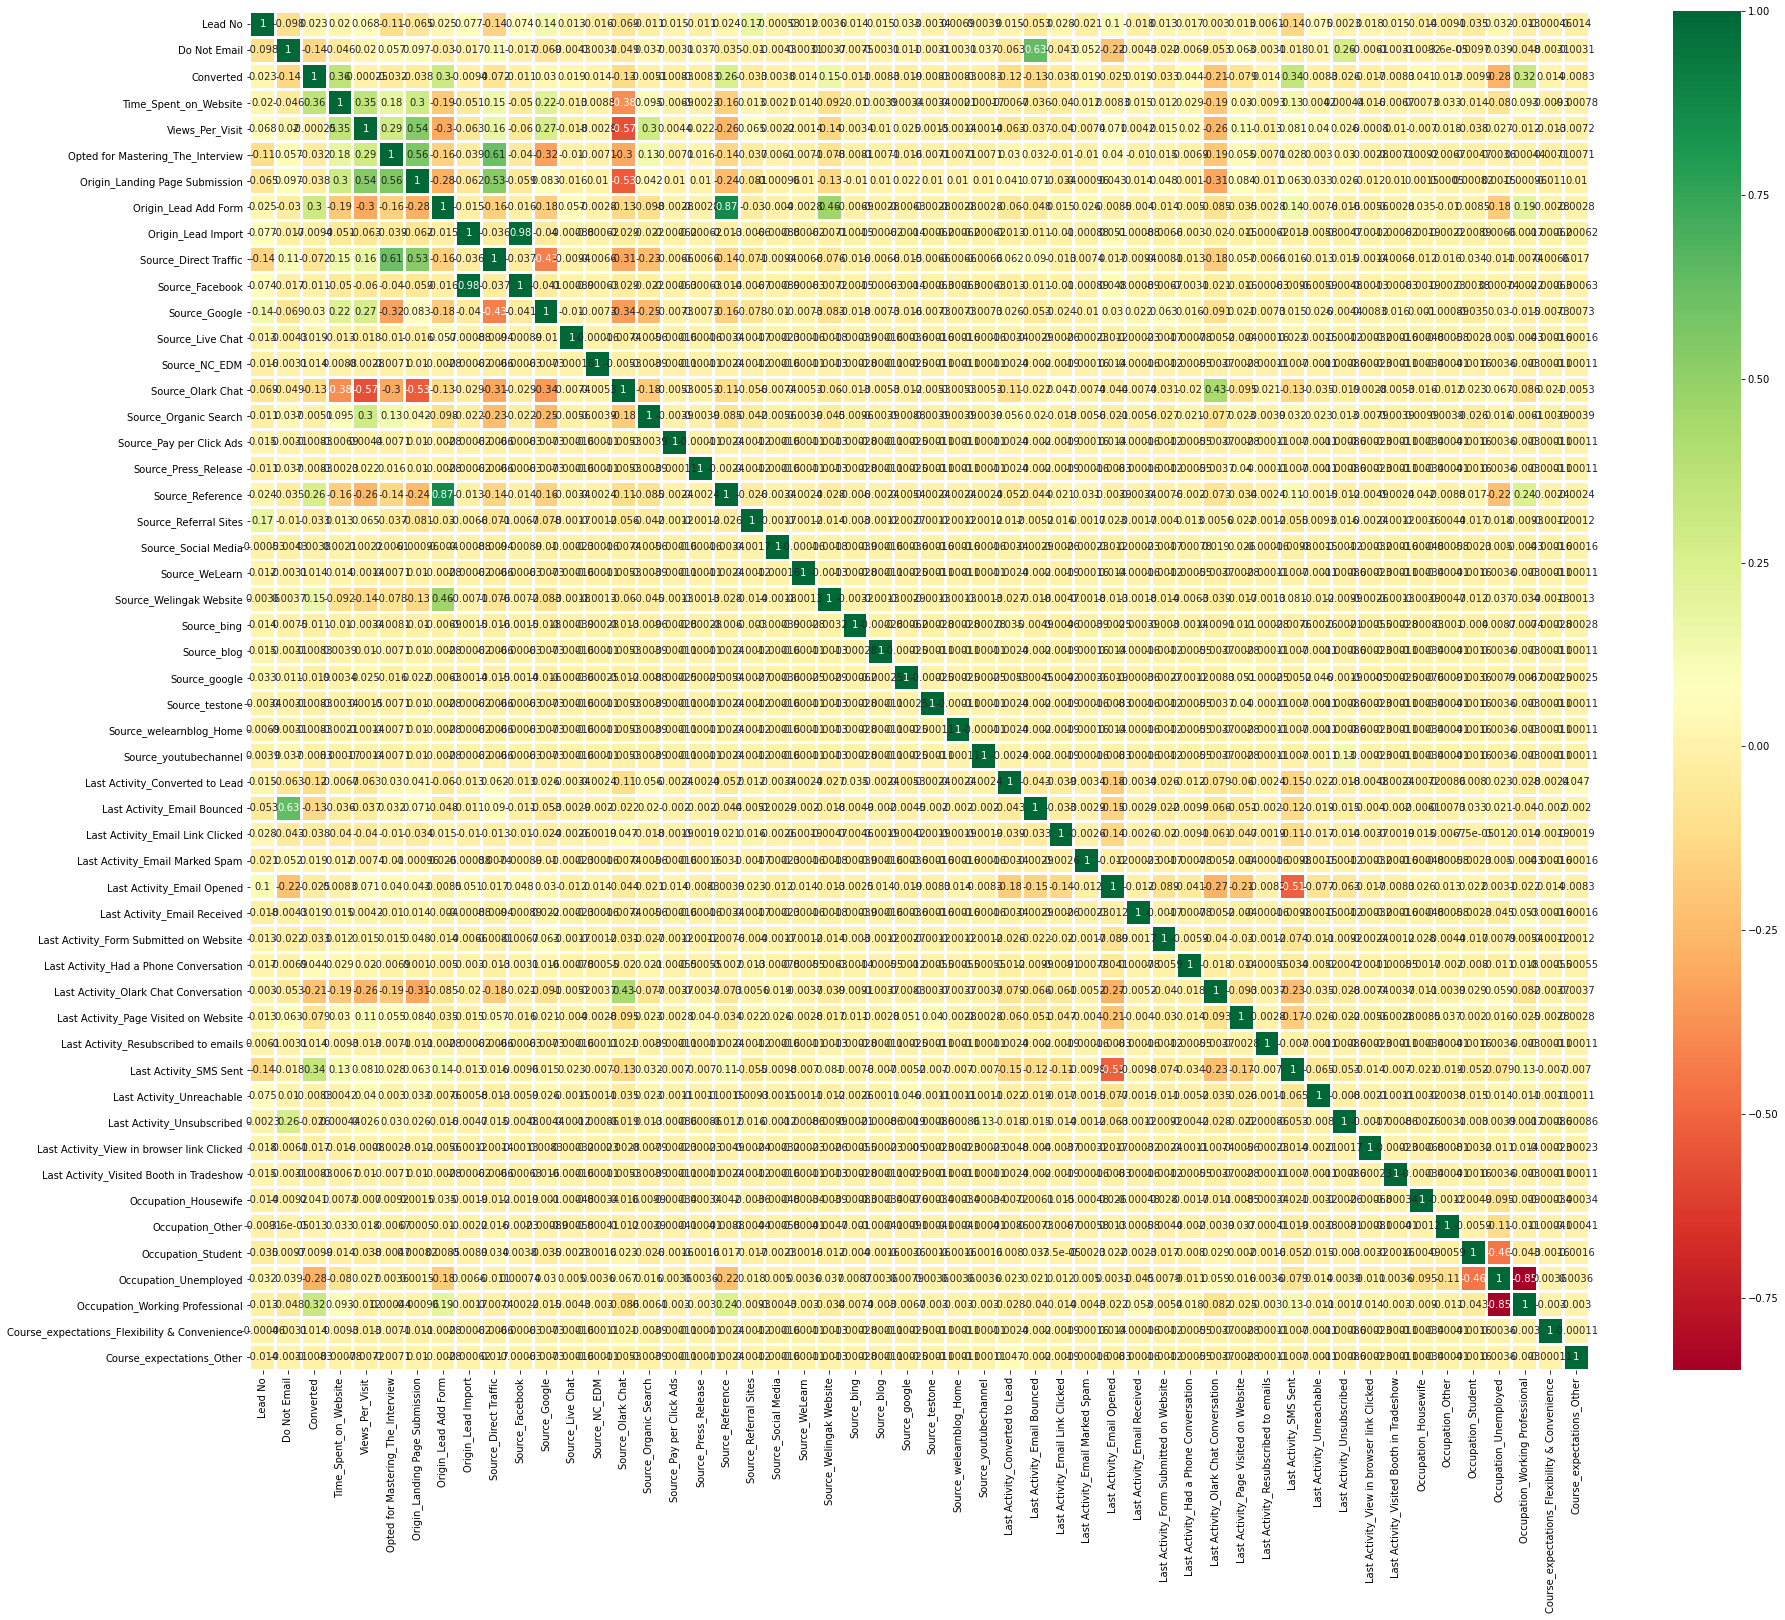

In [47]:
fig, ax = plt.subplots(figsize=(30,25))         # Size of the figure
sns.heatmap(Lead_df.corr(),annot = True, cmap='RdYlGn',linewidths=2, ax= ax)
plt.show()

In [48]:
# We drop 'Source_Reference and 'Source_Facebook' columns due to their high multi collinearity with other variables

Lead_df.drop(['Lead No','Source_Reference', 'Source_Facebook'], axis='columns', inplace=True)

In [49]:
# we drop the 'Converted' column for our X variables dataframe 

X = Lead_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Time_Spent_on_Website,Views_Per_Visit,Opted for Mastering_The_Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Direct Traffic,Source_Google,Source_Live Chat,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course_expectations_Flexibility & Convenience,Course_expectations_Other
0,0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1532,2.0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,305,1.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1428,1.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
# and we assign 'Converted' to our y variable since this is our target variable

y = Lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
# we split our datasets into train and test datasets below

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
#We use the Minmaxscaler to bring uniformity in the data range for our Numerical variables

scaler = MinMaxScaler()

X_train[['Time_Spent_on_Website','Views_Per_Visit']] = scaler.fit_transform(X_train[['Time_Spent_on_Website','Views_Per_Visit']])
X_train.head()

,Do Not Email,Time_Spent_on_Website,Views_Per_Visit,Opted for Mastering_The_Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Direct Traffic,Source_Google,Source_Live Chat,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course_expectations_Flexibility & Convenience,Course_expectations_Other
5425,0,0.064241,0.3750,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8586,1,0.156334,0.5000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4631,0,0.160377,0.3125,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4464,0,0.084007,0.1875,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2058,0,0.067835,0.1750,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
conversion = (sum(Lead_df['Converted'])/len(Lead_df['Converted'].index))*100
conversion

37.80886832900824

We have almost 38% conversion rate 

In [55]:
# We start building our logistic regression model below

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6158
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Mar 2021   Deviance:                          nan
Time:                        14:02:36   Pearson chi2:                 7.37e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                         -3.018e+14    8.9e+07  -3.39e+06      0.000   -3.02e+14   -3.02e+14
Do Not Email                                  -9.424e+13    4.5e+06  -2.09e+07      0.000   -9.42e+13   -9.42e+13
Time_Spent_on_Website                          3.397e+15   4.03e+06   8.43e+08      0.000     3.4e+15     3.4e+15
Views_Per_Visit                               -1.621e+14   5.64e+06  -2.88e+07      0.000   -1.62e+14   -1.62e+14
Opted for Mastering_The_Interview              2.692e+13    2.7e+06   9.96e+06      0.000    2.69e+13    2.69e+13
Origin_Landing Page Submission                -8.204e+13   2.76e+06  -2.97e+07      0.000    -8.2e+13    -8.2e+13
Origin_Lead Add Form                           4.405e+15   4.77e+07   9.24e+07      0.000    4.41e+15    4.41e+15
Origin_Lead Import                             2.018e+15   5.02e+07   4.02e+07      0.000    2.02e+15    2.02e+15
Source_Direct Traffic                           1.73e+15   4.78e+07   3.62e+07      0.000    1.73e+15    1.73e+15
Source_Google                                  2.132e+15   4.77e+07   4.47e+07      0.000    2.13e+15    2.13e+15
Source_Live Chat                               3.855e+15   6.72e+07   5.73e+07      0.000    3.86e+15    3.86e+15
Source_NC_EDM                                  5.747e+15   8.24e+07   6.98e+07      0.000    5.75e+15    5.75e+15
Source_Olark Chat                              1.273e+15   4.77e+07   2.67e+07      0.000    1.27e+15    1.27e+15
Source_Organic Search                          1.935e+15   4.78e+07   4.05e+07      0.000    1.93e+15    1.93e+15
Source_Pay per Click Ads                      -2.005e+15   8.23e+07  -2.43e+07      0.000      -2e+15      -2e+15
Source_Press_Release                          -2.204e+15   8.26e+07  -2.67e+07      0.000    -2.2e+15    -2.2e+15
Source_Referral Sites                          1.862e+15   4.84e+07   3.85e+07      0.000    1.86e+15    1.86e+15
Source_Social Media                           -2.063e+15   8.25e+07   -2.5e+07      0.000   -2.06e+15   -2.06e+15
Source_WeLearn                                 5.366e+15   8.24e+07   6.51e+07      0.000    5.37e+15    5.37e+15
Source_Welingak Website                        1.182e+14   7.87e+06    1.5e+07      0.000    1.18e+14    1.18e+14
Source_bing                                    2.831e+15   6.15e+07   4.61e+07      0.000    2.83e+15    2.83e+15
Source_blog                                    1.677e+15   8.24e+07   2.04e+07      0.000    1.68e+15    1.68e+15
Source_google                                 -2.891e+15   6.75e+07  -4.28e+07      0.000   -2.89e+15   -2.89e+15
Source_testone                                 -2.26e+15   8.25e+07  -2.74e+07      0.000   -2.26e+15   -2.26e+15
Sourc

In [56]:
# We use RFE to find out the 15 best columns to include in our model

logreg = LogisticRegression()

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Time_Spent_on_Website', True, 1),
 ('Views_Per_Visit', False, 31),
 ('Opted for Mastering_The_Interview', False, 29),
 ('Origin_Landing Page Submission', False, 17),
 ('Origin_Lead Add Form', True, 1),
 ('Origin_Lead Import', False, 24),
 ('Source_Direct Traffic', False, 10),
 ('Source_Google', False, 13),
 ('Source_Live Chat', False, 27),
 ('Source_NC_EDM', False, 5),
 ('Source_Olark Chat', True, 1),
 ('Source_Organic Search', False, 12),
 ('Source_Pay per Click Ads', False, 20),
 ('Source_Press_Release', False, 28),
 ('Source_Referral Sites', False, 11),
 ('Source_Social Media', False, 22),
 ('Source_WeLearn', False, 16),
 ('Source_Welingak Website', True, 1),
 ('Source_bing', False, 19),
 ('Source_blog', False, 14),
 ('Source_google', False, 7),
 ('Source_testone', False, 21),
 ('Source_welearnblog_Home', False, 18),
 ('Source_youtubechannel', False, 33),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last 

In [57]:
col = X_train.columns[rfe.support_]

In [58]:
X_train_sm2 = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.4
Date:                Mon, 08 Mar 2021   Deviance:                       5234.9
Time:                        14:03:01   Pearson chi2:                 6.81e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0074      0.668     -1.509      0.131      -2.316       0.301
Do Not Email                                     -1.2529      0.194     -6.469      0.000      -1.632      -0.873
Time_Spent_on_Website                             4.6121      0.164     28.076      0.000       4.290       4.934
Origin_Lead Add Form                              3.8604      0.224     17.224      0.000       3.421       4.300
Source_Olark Chat                                 1.2865      0.104     12.394      0.000       1.083       1.490
Source_Welingak Website                           2.7089      1.036      2.614      0.009       0.678       4.740
Last Activity_Converted to Lead                  -1.0478      0.199     -5.276      0.000      -1.437      -0.659
Last Activity_Email Bounced                      -0.7569      0.368     -2.056      0.040      -1.479      -0.035
Last Activity_Had a Phone Conversation            3.1730      0.863      3.677      0.000       1.482       4.864
Last Activity_Olark Chat Conversation            -1.4688      0.161     -9.106      0.000      -1.785      -1.153
Last Activity_SMS Sent                            1.2500      0.076     16.535      0.000       1.102       1.398
Occupation_Housewife                             21.8210   1.68e+04      0.001      0.999    -3.3e+04     3.3e+04
Occupation_Student                               -1.0586      0.699     -1.514      0.130      -2.429       0.312
Occupation_Unemployed                            -1.4354      0.666     -2.154      0.031      -2.742      -0.129
Occupation_Working Professional                   1.4289      0.691      2.067      0.039       0.074       2.784
Course_expectations_Flexibility & Convenience    23.7224   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
=================================================================================================================
"""

In [59]:
# before deleting any feature based on their P value we will run the VIF to see if there are any multi collinearity

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Occupation_Unemployed,3.58
1,Time_Spent_on_Website,2.31
3,Source_Olark Chat,1.81
0,Do Not Email,1.79
6,Last Activity_Email Bounced,1.74
9,Last Activity_SMS Sent,1.68
2,Origin_Lead Add Form,1.61
8,Last Activity_Olark Chat Conversation,1.45
13,Occupation_Working Professional,1.41
4,Source_Welingak Website,1.33


In [60]:
# since all the VIFs are withing 4 we feel these are reasonble
# therefore we first drop 'Course_expectations_Flexibility & Convenience' feature from our list of columns in the model due to its high P value


col = col.drop(['Course_expectations_Flexibility & Convenience'],1)
col

Index(['Do Not Email', 'Time_Spent_on_Website', 'Origin_Lead Add Form',
       'Source_Olark Chat', 'Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Occupation_Housewife', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional'],
      dtype='object')

In [61]:
X_train_sm3 = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.9
Date:                Mon, 08 Mar 2021   Deviance:                       5237.7
Time:                        14:03:08   Pearson chi2:                 6.81e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0077      0.668     -1.509      0.131      -2.316       0.301
Do Not Email                              -1.2529      0.194     -6.470      0.000      -1.632      -0.873
Time_Spent_on_Website                      4.6114      0.164     28.073      0.000       4.289       4.933
Origin_Lead Add Form                       3.8601      0.224     17.224      0.000       3.421       4.299
Source_Olark Chat                          1.2913      0.104     12.449      0.000       1.088       1.495
Source_Welingak Website                    2.7091      1.036      2.614      0.009       0.678       4.740
Last Activity_Converted to Lead           -1.0484      0.199     -5.279      0.000      -1.438      -0.659
Last Activity_Email Bounced               -0.7585      0.368     -2.060      0.039      -1.480      -0.037
Last Activity_Had a Phone Conversation     3.1721      0.863      3.676      0.000       1.481       4.863
Last Activity_Olark Chat Conversation     -1.4728      0.161     -9.133      0.000      -1.789      -1.157
Last Activity_SMS Sent                     1.2485      0.076     16.519      0.000       1.100       1.397
Occupation_Housewife                      21.8213   1.68e+04      0.001      0.999    -3.3e+04     3.3e+04
Occupation_Student                        -1.0587      0.699     -1.514      0.130      -2.429       0.311
Occupation_Unemployed                     -1.4341      0.666     -2.152      0.031      -2.740      -0.128
Occupation_Working Professional            1.4294      0.691      2.068      0.039       0.075       2.784
==========================================================================================================
"""

In [62]:
# next we drop 'Occupation_Housewife' from our list of columns to be used in our regression model

col = col.drop(['Occupation_Housewife'],1)
col

Index(['Do Not Email', 'Time_Spent_on_Website', 'Origin_Lead Add Form',
       'Source_Olark Chat', 'Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional'],
      dtype='object')

In [63]:
X_train_sm4 = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.8
Date:                Mon, 08 Mar 2021   Deviance:                       5241.5
Time:                        14:03:09   Pearson chi2:                 6.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.4409      0.626     -0.705      0.481      -1.667       0.785
Do Not Email                              -1.2561      0.194     -6.479      0.000      -1.636      -0.876
Time_Spent_on_Website                      4.6061      0.164     28.058      0.000       4.284       4.928
Origin_Lead Add Form                       3.8614      0.224     17.237      0.000       3.422       4.300
Source_Olark Chat                          1.2886      0.104     12.426      0.000       1.085       1.492
Source_Welingak Website                    2.7061      1.036      2.611      0.009       0.675       4.737
Last Activity_Converted to Lead           -1.0483      0.199     -5.280      0.000      -1.437      -0.659
Last Activity_Email Bounced               -0.7555      0.368     -2.052      0.040      -1.477      -0.034
Last Activity_Had a Phone Conversation     3.1715      0.863      3.675      0.000       1.480       4.863
Last Activity_Olark Chat Conversation     -1.4720      0.161     -9.129      0.000      -1.788      -1.156
Last Activity_SMS Sent                     1.2483      0.076     16.520      0.000       1.100       1.396
Occupation_Student                        -1.6236      0.660     -2.460      0.014      -2.917      -0.330
Occupation_Unemployed                     -1.9989      0.625     -3.196      0.001      -3.225      -0.773
Occupation_Working Professional            0.8642      0.651      1.327      0.185      -0.412       2.141
==========================================================================================================
"""

In [64]:
# Lastly we drop 'Occupation_Working Professional' from our list of columns to be used in our regression model due to high P value

col = col.drop(['Occupation_Working Professional'],1)
col

Index(['Do Not Email', 'Time_Spent_on_Website', 'Origin_Lead Add Form',
       'Source_Olark Chat', 'Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Occupation_Student', 'Occupation_Unemployed'],
      dtype='object')

In [102]:
X_train_sm5 = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6191
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.6
Date:                Mon, 08 Mar 2021   Deviance:                       5243.1
Time:                        14:10:35   Pearson chi2:                 6.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.3631      0.186      1.955      0.051      -0.001       0.727
Do Not Email                              -1.2562      0.194     -6.477      0.000      -1.636      -0.876
Time_Spent_on_Website                      4.6043      0.164     28.049      0.000       4.283       4.926
Origin_Lead Add Form                       3.8621      0.224     17.242      0.000       3.423       4.301
Source_Olark Chat                          1.2888      0.104     12.429      0.000       1.086       1.492
Source_Welingak Website                    2.7047      1.036      2.610      0.009       0.674       4.736
Last Activity_Converted to Lead           -1.0410      0.198     -5.256      0.000      -1.429      -0.653
Last Activity_Email Bounced               -0.7493      0.368     -2.037      0.042      -1.470      -0.028
Last Activity_Had a Phone Conversation     3.1735      0.863      3.678      0.000       1.483       4.864
Last Activity_Olark Chat Conversation     -1.4687      0.161     -9.116      0.000      -1.784      -1.153
Last Activity_SMS Sent                     1.2513      0.075     16.575      0.000       1.103       1.399
Occupation_Student                        -2.4287      0.279     -8.709      0.000      -2.975      -1.882
Occupation_Unemployed                     -2.8040      0.182    -15.378      0.000      -3.161      -2.447
==========================================================================================================
"""

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,2.98
1,Time_Spent_on_Website,1.97
0,Do Not Email,1.78
6,Last Activity_Email Bounced,1.74
3,Source_Olark Chat,1.72
9,Last Activity_SMS Sent,1.60
8,Last Activity_Olark Chat Conversation,1.45
2,Origin_Lead Add Form,1.42
4,Source_Welingak Website,1.31
5,Last Activity_Converted to Lead,1.11


In [66]:
# We believe we have reached an optimal model
# Hence below we make sure that our train dataset include the above relevant columns

In [67]:
X_train = X_train[col]

In [68]:
y_train_pred = res5.predict(X_train_sm5)
y_train_pred[:10]

5425    0.871038
8586    0.023508
4631    0.154134
4464    0.309416
2058    0.106345
1719    0.176662
2286    0.625431
1433    0.333549
5550    0.067809
8333    0.111360
dtype: float64

In [69]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.87103758, 0.02350836, 0.15413429, 0.30941582, 0.10634504,
       0.17666161, 0.62543059, 0.333549  , 0.06780914, 0.11136036])

In [70]:
# Now we will create the 'Conversion Probability' column that will be provided values by our model.


y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final['Lead No'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead No
0,1,0.871038,5425
1,0,0.023508,8586
2,0,0.154134,4631
3,0,0.309416,4464
4,0,0.106345,2058


In [71]:
# Let us sort the values based on 'Coversion_Prob' and see if high probability values have converted values of 1 corresponding to them

y_train_pred_final.sort_values(by='Conversion_Probability', ascending=False)

,Converted,Conversion_Probability,Lead No
5144,1,0.999582,7219
1008,1,0.998738,8120
4279,1,0.998630,4613
4868,1,0.998244,4062
4087,1,0.998193,7234
...,...,...,...
2333,0,0.008683,6283
1649,0,0.007837,7046
880,0,0.007399,976
2142,0,0.006774,7488


In [72]:
# now we will convert the probability into a categorical variable with a cut-off of 0.5.
# in other words a probability of more than 0.5 would return a converion of 1 (i.e 'yes') and less than 0.5 would return 0 (i.e 'no)')

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,Lead No,predicted
0,1,0.871038,5425,1
1,0,0.023508,8586,0
2,0,0.154134,4631,0
3,0,0.309416,4464,0
4,0,0.106345,2058,0


In [73]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3410  453]
 [ 704 1637]]


In [74]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8135074145712443


In [75]:
# at a cutoff of 0.5 our model accuracy is 81%. Let us have a look at other parameters of model evaluation

In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
TP / float(TP+FN)

# at a cutoff of 0.5 our model sensitivity/recall is 70%

0.6992738146091414

In [78]:
TN / float(TN+FP)

# at a cutoff of 0.5 our model specificity is 88%

0.8827336267149883

In [79]:
print (TP / float(TP+FP))

# at a cutoff of 0.5 our model precision is 78%

0.7832535885167464


In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

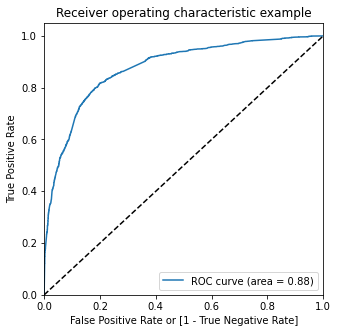

In [82]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

In [83]:
# creating 10 points out of which one we will choose for our cutoff point


numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead No,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.871038,5425,1,1,1,1,1,1,1,1,1,1,0
1,0,0.023508,8586,0,1,0,0,0,0,0,0,0,0,0
2,0,0.154134,4631,0,1,1,0,0,0,0,0,0,0,0
3,0,0.309416,4464,0,1,1,1,1,0,0,0,0,0,0
4,0,0.106345,2058,0,1,1,0,0,0,0,0,0,0,0


In [84]:
from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                           # Inserting all the data into the dataframe created earlier
print(df_cutoffs) 

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.377337    1.000000     0.000000
0.1          0.1  0.593649    0.959846     0.371732
0.2          0.2  0.728401    0.919265     0.612736
0.3          0.3  0.797872    0.831696     0.777375
0.4          0.4  0.814958    0.762922     0.846492
0.5          0.5  0.813507    0.699274     0.882734
0.6          0.6  0.791908    0.576677     0.922340
0.7          0.7  0.778369    0.497223     0.948744
0.8          0.8  0.757253    0.404955     0.970748
0.9          0.9  0.711476    0.254165     0.988610


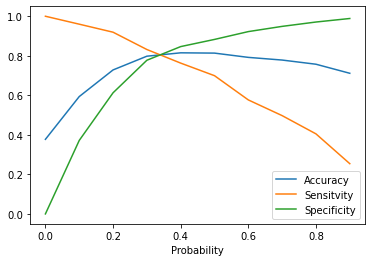

In [85]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])
plt.show()

In [86]:
# Based on our analysis above we feel a cutoff of 0.35 would be better than 0.5. 
# We shall change the cut-off and see what are the new precision and recall values

In [87]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,Lead No,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.871038,5425,1,1,1,1,1,1,1,1,1,1,0
1,0,0.023508,8586,0,1,0,0,0,0,0,0,0,0,0
2,0,0.154134,4631,0,1,1,0,0,0,0,0,0,0,0
3,0,0.309416,4464,0,1,1,1,1,0,0,0,0,0,0
4,0,0.106345,2058,0,1,1,0,0,0,0,0,0,0,0


In [88]:
# Creating confusion matrix to find precision and recall score

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3166  697]
 [ 476 1865]]


In [89]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8109284332688588


In [90]:
# at a cutoff of 0.35 our model accuracy is 81%. Let us have a look at other parameters of model evaluation

In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
TP / float(TP+FN)

# at a cutoff of 0.35 our model sensitivity/recall is 80%

0.7966680905595899

In [93]:
TN / float(TN+FP)

# at a cutoff of 0.35 our model specificity is 82%

0.8195702821641212

In [106]:
print (TP / float(TP+FP))

# at a cutoff of 0.35 our model precision is 73%

0.7279469164715067


In [95]:
# now we will scale the test dataset

In [96]:
X_test[['Time_Spent_on_Website','Views_Per_Visit']] = scaler.transform(X_test[['Time_Spent_on_Website','Views_Per_Visit']])



In [97]:
# Predicting the test dataset with our final model

test_cols=X_train[col]              # Taking the same column train set has
X_test_final=X_test[col]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=res5.predict(X_test_final)       # Predicting the final test set

In [98]:
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Conversion_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Conversion_Probability,ID
8788,0,0.840046,8788
7813,0,0.129750,7813
2403,1,0.852681,2403
7243,1,0.476690,7243
5363,1,0.893997,5363


In [99]:
y_test_pred_final['Predicted']=y_test_pred_final['Conversion_Probability'].map(lambda x:1 if x >0.35 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Conversion_Probability,ID,Predicted
8788,0,0.840046,8788,1
7813,0,0.129750,7813,0
2403,1,0.852681,2403,1
7243,1,0.476690,7243,1
5363,1,0.893997,5363,1


In [100]:
# Checking the accuracy of the test dataset.

from sklearn import metrics    # Imprting metrics from sklearn

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))  

Accuracy score in predicting test dataset : 0.8033095148552087


In [101]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the precision score

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))      # Printing the recall score

Precision score in predicting test dataset: 0.7256719184430028
Recall score in predicting test dataset: 0.7752475247524753


## Conclusion
### The Accuracy, Precision and Recall score we got from test set in aceptable range.
### Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
     Time_Spent_on_Website
     Last Activity_Had a Phone Conversation
     Lead Origin_Lead Add Form
### We have high recall score than precision score which we were exactly looking for.

In [105]:
y_test.head()

8788    0
7813    0
2403    1
7243    1
5363    1
Name: Converted, dtype: int64

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)